<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/MachineLeaning/blob/main/Treenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

X = np.random.rand(100, 5)
y = np.random.rand(100)

model = GradientBoostingRegressor(n_estimators=100, max_depth=3)
model.fit(X, y)

for i, estimator in enumerate(model.estimators_):
    tree = estimator[0].tree_

    values = tree.value.flatten()
    conditions = []

    for node in range(tree.node_count):
        if tree.children_left[node] == -1:
            threshold = tree.threshold[node]
            feature = tree.feature[node]
            conditions.append((feature, threshold, values[node]))

    max_condition = max(conditions, key=lambda x: x[2])
    print(f"Tree {i+1}: Highest value = {max_condition[2]}, Feature = {max_condition[0]}, Threshold = {max_condition[1]}")


Tree 1: Highest value = 0.295361950338311, Feature = -2, Threshold = -2.0
Tree 2: Highest value = 0.2658257553044798, Feature = -2, Threshold = -2.0
Tree 3: Highest value = 0.1330414662437705, Feature = -2, Threshold = -2.0
Tree 4: Highest value = 0.2104737623919381, Feature = -2, Threshold = -2.0
Tree 5: Highest value = 0.12229301886009691, Feature = -2, Threshold = -2.0
Tree 6: Highest value = 0.476245132837979, Feature = -2, Threshold = -2.0
Tree 7: Highest value = 0.1763650764887155, Feature = -2, Threshold = -2.0
Tree 8: Highest value = 0.3832934072548033, Feature = -2, Threshold = -2.0
Tree 9: Highest value = 0.06803460734959982, Feature = -2, Threshold = -2.0
Tree 10: Highest value = 0.4117038840082312, Feature = -2, Threshold = -2.0
Tree 11: Highest value = 0.39075508998186237, Feature = -2, Threshold = -2.0
Tree 12: Highest value = 0.3685289873253388, Feature = -2, Threshold = -2.0
Tree 13: Highest value = 0.35096603210533694, Feature = -2, Threshold = -2.0
Tree 14: Highest va

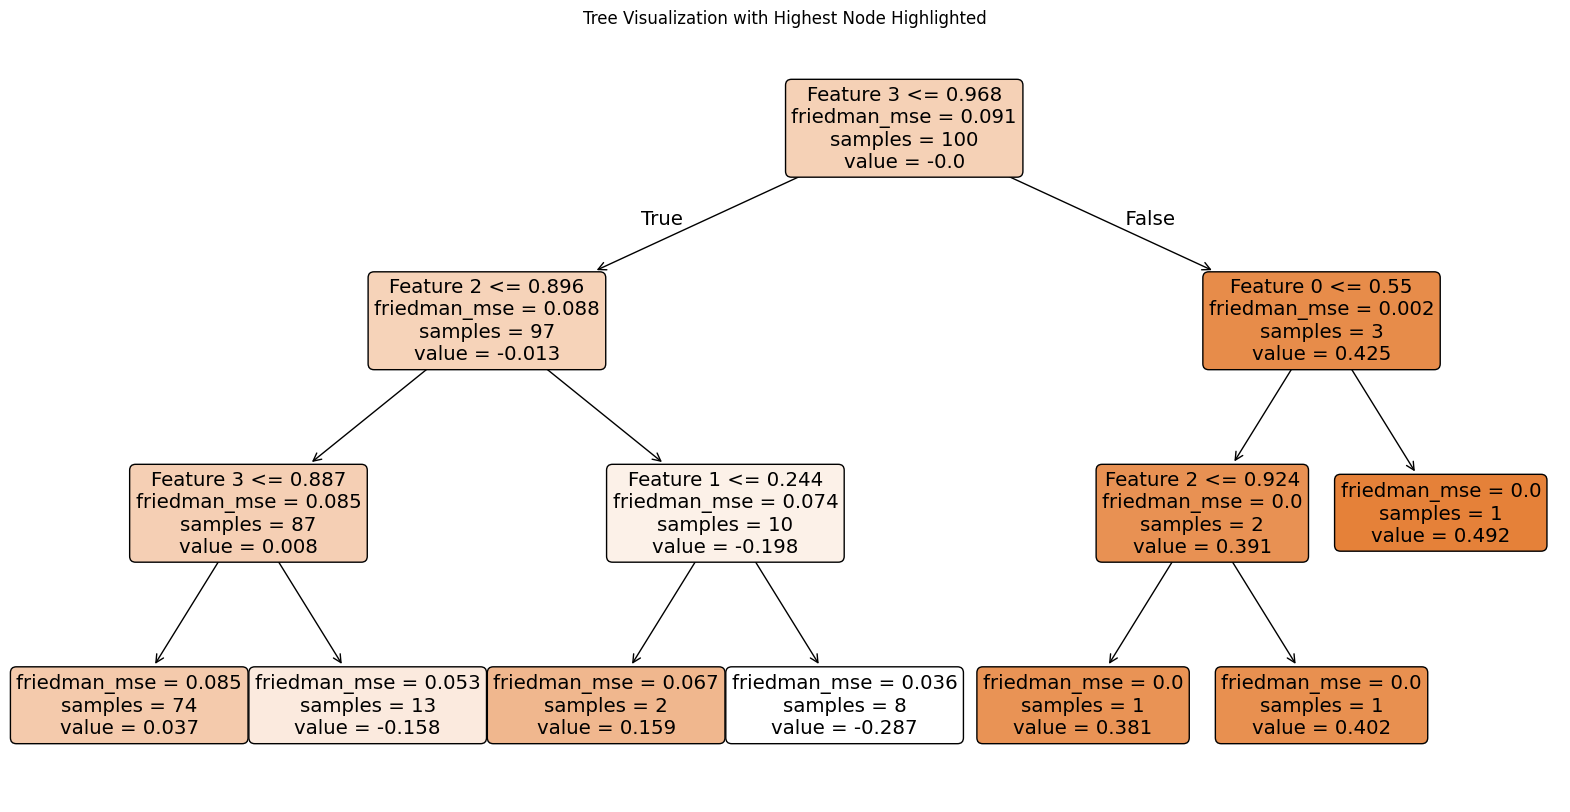

가장 높은 노드 인덱스: 12
최고 결과 값: 0.4917337409671081
특징 인덱스: -2
분기 기준: -2.0


In [2]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree


np.random.seed(0)
X = np.random.rand(100, 5)
y = np.random.rand(100)

model = GradientBoostingRegressor(n_estimators=1, max_depth=3)
model.fit(X, y)

estimator = model.estimators_[0, 0]

tree = estimator.tree_
values = tree.value.flatten()
max_node = np.argmax(values)
max_value = values[max_node]
feature = tree.feature[max_node]
threshold = tree.threshold[max_node]

plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, feature_names=[f"Feature {i}" for i in range(X.shape[1])], rounded=True)

ax = plt.gca()
for artist in ax.get_children():
    if hasattr(artist, 'get_text') and str(max_value) in artist.get_text():
        artist.set_facecolor("red")

plt.title("Tree Visualization with Highest Node Highlighted")
plt.show()

print(f"가장 높은 노드 인덱스: {max_node}")
print(f"최고 결과 값: {max_value}")
print(f"특징 인덱스: {feature}")
print(f"분기 기준: {threshold}")


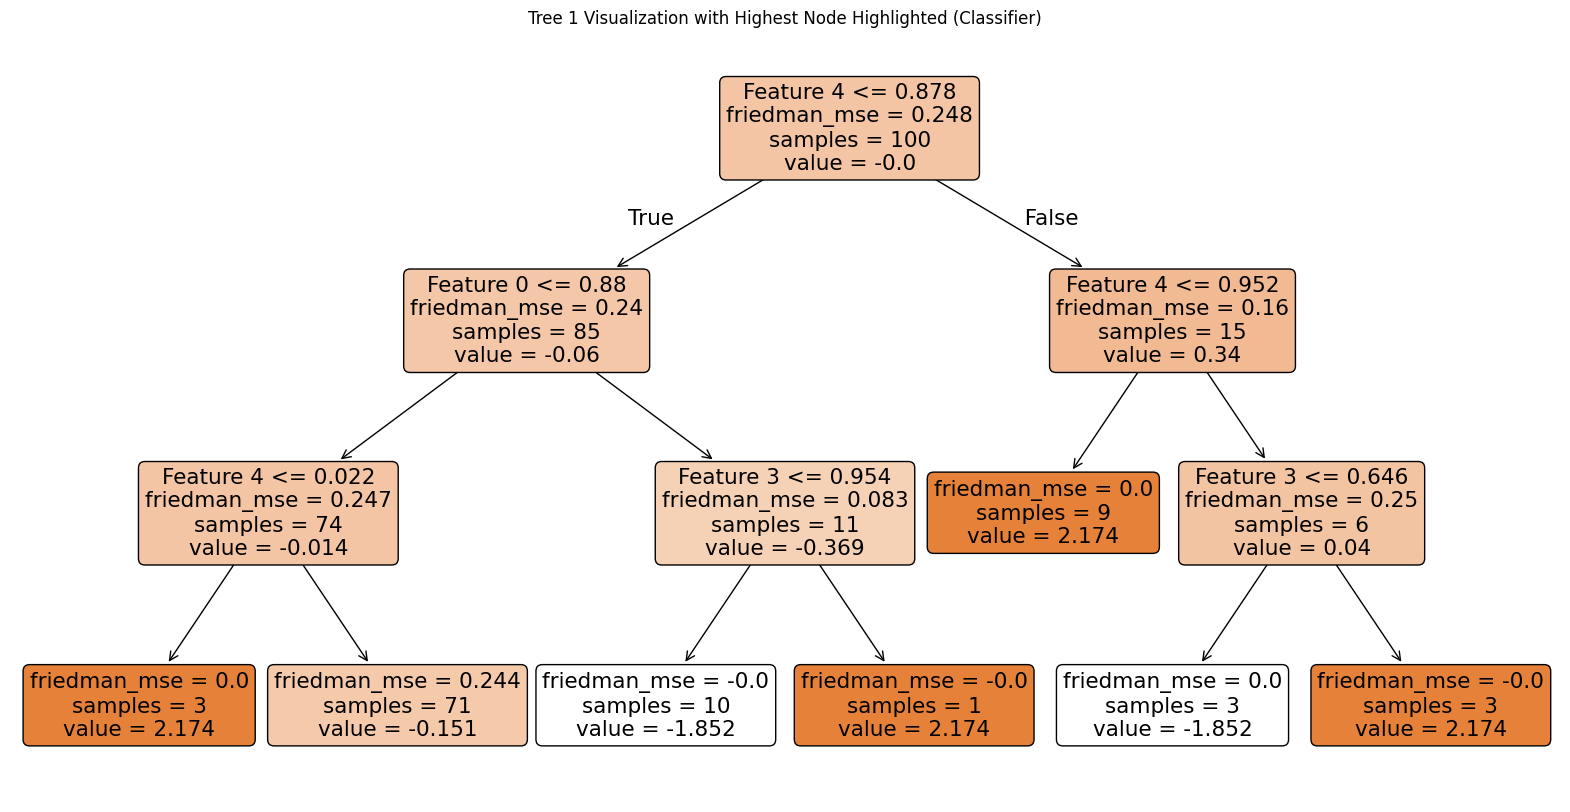

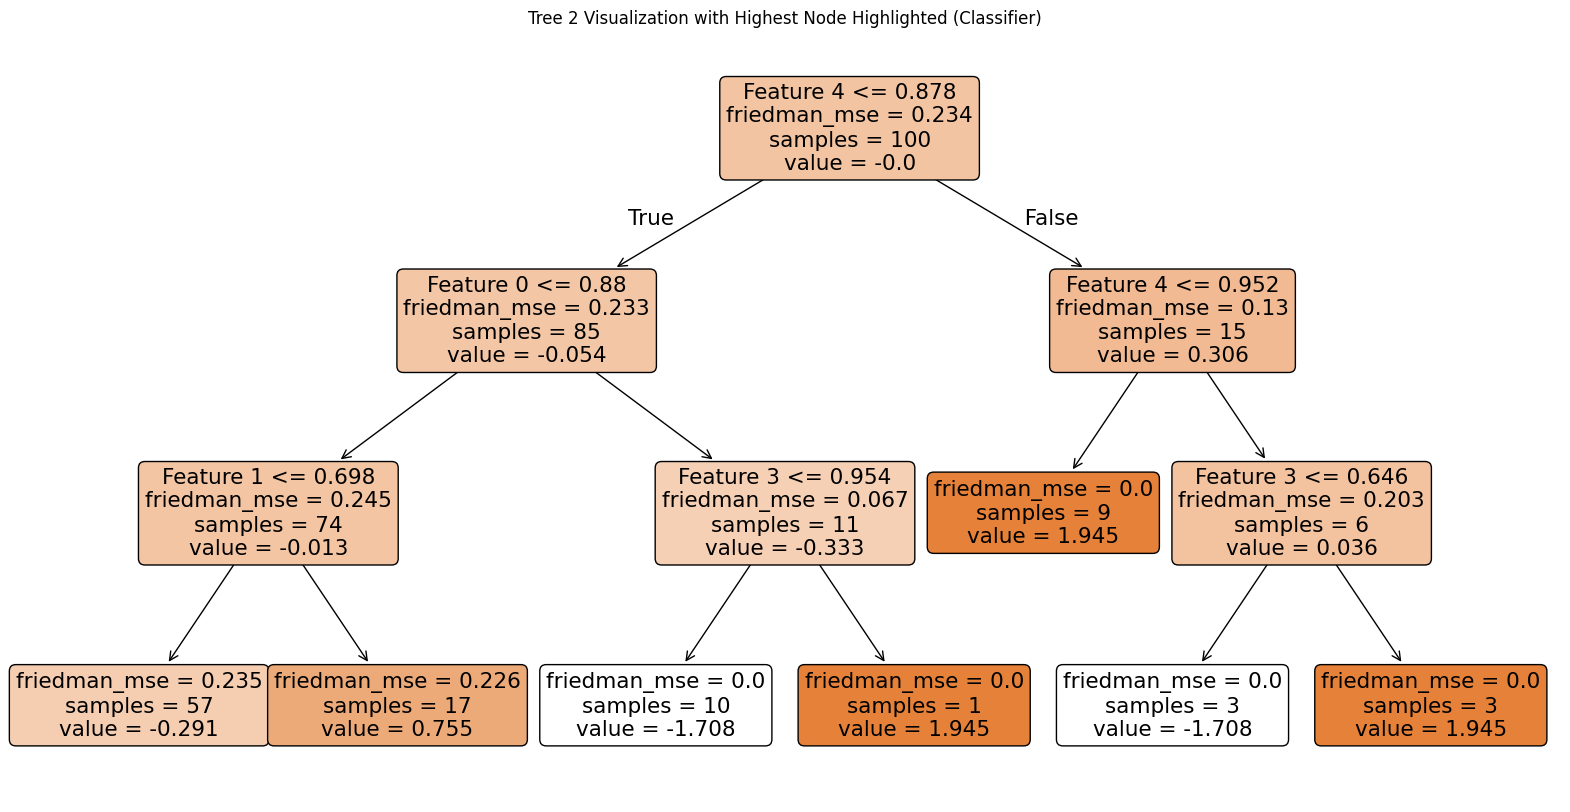

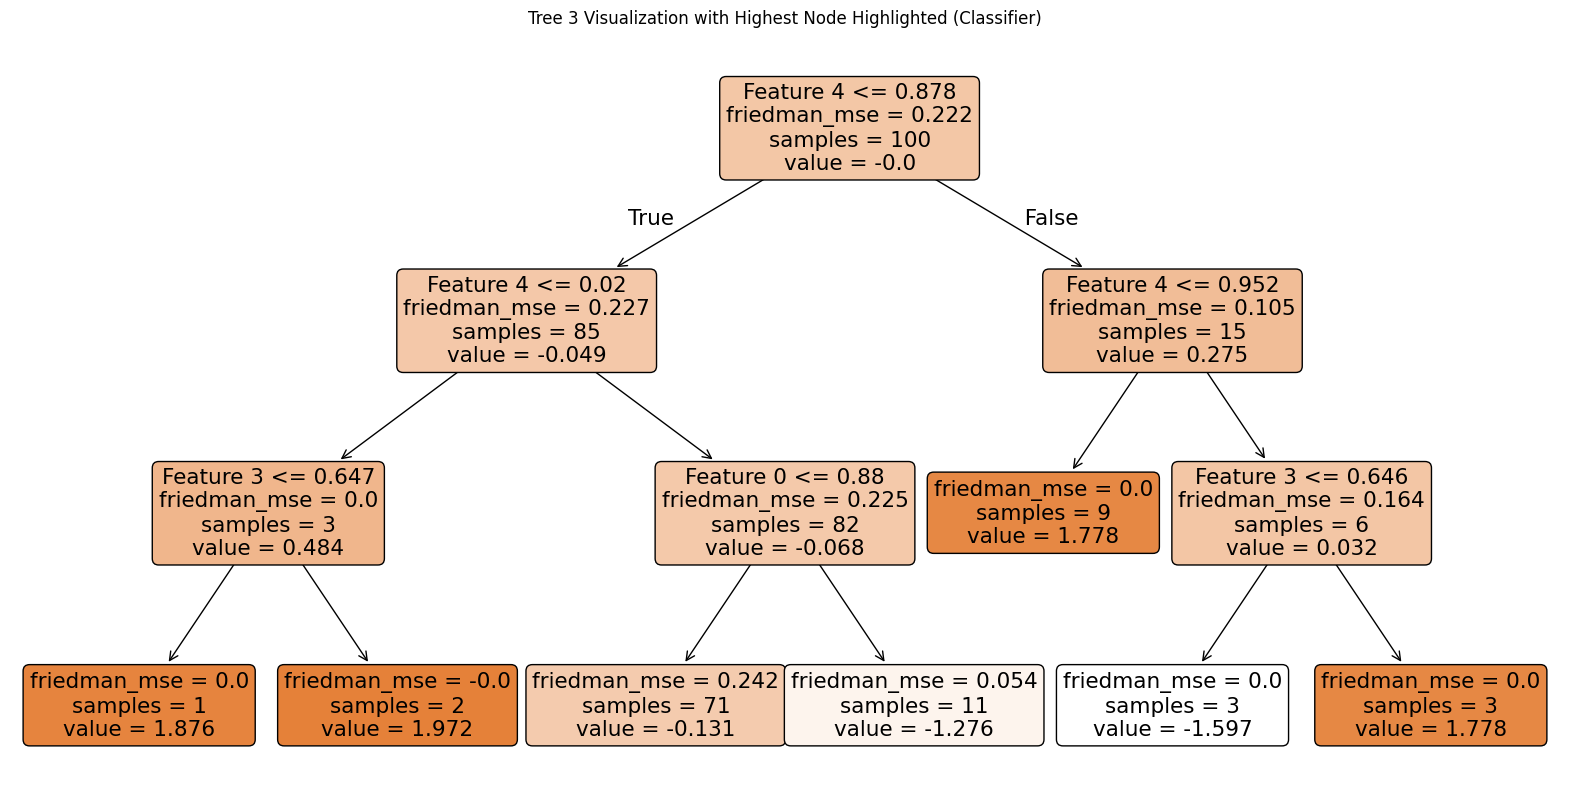

   Tree Index  Node Index Max Class Probabilities  Feature Index  Threshold
0           1           0                   [1.0]              4   0.878004
1           2           0                   [1.0]              4   0.878004
2           3           0                   [1.0]              4   0.878004


In [14]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier


np.random.seed(0)
X = np.random.rand(100, 5)
y = np.random.randint(0, 2, 100)

model = GradientBoostingClassifier(n_estimators=3, max_depth=3)
model.fit(X, y)

tree_info = []
for i, estimator in enumerate(model.estimators_):
    tree = estimator[0].tree_
    values = tree.value[:, 0, :]
    class_probs = values / values.sum(axis=1, keepdims=True)
    max_node = np.argmax(np.max(class_probs, axis=1))
    max_value = class_probs[max_node]
    feature = tree.feature[max_node]
    threshold = tree.threshold[max_node]

    tree_info.append({
        "Tree Index": i + 1,
        "Node Index": max_node,
        "Max Class Probabilities": max_value,
        "Feature Index": feature,
        "Threshold": threshold
    })

    plt.figure(figsize=(20, 10))
    plot_tree(estimator[0], filled=True, feature_names=[f"Feature {j}" for j in range(X.shape[1])], rounded=True)

    ax = plt.gca()
    for artist in ax.get_children():
        if hasattr(artist, 'get_text') and str(max_value[0]) in artist.get_text():
            artist.set_facecolor("red")

            bbox = artist.get_window_extent()
            ax.text(bbox.x0, bbox.y0, f"Node: {max_node}\nProb: {max_value[0]:.3f}\nFeature: {feature}\nThresh: {threshold:.3f}",
                    fontsize=10, color="black", ha="center", va="bottom", bbox=dict(facecolor='white', alpha=0.7))

    plt.title(f"Tree {i + 1} Visualization with Highest Node Highlighted (Classifier)")
    plt.show()


tree_info_df = pd.DataFrame(tree_info)
print(tree_info_df)

